In [1]:
import pandas as pd
import numpy as np

In [7]:
pd.to_datetime('Jan 15, 1997').day_name()

'Wednesday'

In [8]:
pd.to_datetime('Feb 29, 1925')

ValueError: day is out of range for month

In [10]:
pd.to_datetime(1000000, unit='h')

Timestamp('2084-01-29 16:00:00')

In [11]:
pd.to_datetime('July 20, 1969 2:56:15')

Timestamp('1969-07-20 02:56:15')

In [13]:
pd.to_datetime('today') - pd.to_datetime('July 20, 1969, 2:56:15')

Timedelta('18865 days 14:04:43.921299')

In [14]:
35 * 24

840

In [17]:
emp = pd.read_csv('./data/employee.csv', parse_dates=['hire_date'])
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [19]:
emp.insert(1, 'experience', (pd.to_datetime('today') - emp['hire_date']))

In [23]:
emp['experience'] = emp['experience'].dt.days/365

In [24]:
emp.head()

,dept,experience,title,hire_date,salary,sex,race
0,Police,19.290411,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,10.334247,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,15.186301,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,23.813699,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,15.147945,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [33]:
weather = pd.read_csv('./data/weather.csv', index_col='date', parse_dates=['date'])
weather.head()

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-01-02,No,No,55.9
2007-01-03,No,No,62.1
2007-01-04,No,No,69.1
2007-01-05,Yes,No,72.0


In [35]:
weather.loc['June 11, 2017']

rain           No
snow           No
temperature    90
Name: 2017-06-11 00:00:00, dtype: object

In [39]:
weather.loc['10-1-2011':'12-31-2011']['rain'].value_counts()

No     69
Yes    23
Name: rain, dtype: int64

In [40]:
weather.loc['2007']['snow'].value_counts()

No     360
Yes      5
Name: snow, dtype: int64

In [41]:
weather.loc['2012']['snow'].value_counts()

No     364
Yes      2
Name: snow, dtype: int64

In [43]:
weather.asfreq('2W-THU')

,rain,snow,temperature
date,,,
2007-01-04,No,No,69.1
2007-01-18,Yes,Yes,35.1
2007-02-01,Yes,Yes,34.0
2007-02-15,No,No,39.9
2007-03-01,Yes,No,66.9
...,...,...,...
2018-09-27,No,No,79.0
2018-10-11,No,No,79.0
2018-10-25,No,No,55.0


In [44]:
weather.asfreq('MS')

,rain,snow,temperature
date,,,
2007-01-01,Yes,No,68.0
2007-02-01,Yes,Yes,34.0
2007-03-01,Yes,No,66.9
2007-04-01,Yes,No,77.0
2007-05-01,No,No,91.9
...,...,...,...
2018-07-01,No,No,95.0
2018-08-01,No,No,90.0
2018-09-01,No,No,93.0


In [45]:
msft = pd.read_csv('./data/stocks/msft20.csv', parse_dates=['date'], index_col='date')
msft.head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-19,88.250,89.250,85.250,86.313,27.8594,69945600,0.0
1999-10-20,91.563,92.375,90.250,92.250,29.7758,88090600,0.0
1999-10-21,90.563,93.125,90.500,93.063,30.0381,60801200,0.0
1999-10-22,93.563,93.875,91.750,92.688,29.9171,43650600,0.0
1999-10-25,92.000,93.563,91.125,92.438,29.8364,30492200,0.0


In [54]:
msft.resample('W').agg({'volume': ['sum']}).sort_values(by=('volume', 'sum'), ascending=False)

,volume
,sum
date,
2006-05-07,879723200
2002-07-28,837388600
2008-10-12,824330600
2006-04-30,818292700
2000-04-30,736006800
...,...
2019-07-07,69621700
2017-11-26,65531200


In [55]:
msft['up'] = msft['close'].diff() > 0

In [58]:
msft.resample('Q').agg({'up': 'sum'}).reset_index().sort_values('up', ascending=False)

,date,up
8,2001-12-31,43.0
40,2009-12-31,40.0
78,2019-06-30,40.0
67,2016-09-30,40.0
72,2017-12-31,40.0
...,...,...
17,2004-03-31,24.0
7,2001-09-30,23.0
3,2000-09-30,23.0
33,2008-03-31,21.0


In [60]:
msft.resample('Y').agg({'volume': ['min', 'max'], 'close': 'mean'})

volume                  close
                 min        max        mean
date                                       
1999-12-31  12517600  243819200   96.872519
2000-12-31  15734800  313645800   76.220722
2001-12-31  11701600  209348800   62.542290
2002-12-31  18386000  202307800   54.546635
2003-12-31  12076900  210558300   29.238298
2004-12-31  24398700  258269000   27.124718
2005-12-31  27212500  187384300   25.871306
2006-12-31  20456700  591052200   26.290355
2007-12-31  29622600  288121200   30.446745
2008-12-31  16880400  291138900   26.647510
2009-12-31  11083900  281761000   22.976794
2010-12-31  19502500  193888500   27.058675
2011-12-31  21287200  319317900   26.052155
2012-12-31  20842400  165902900   29.820280
2013-12-31  14243000  248428500   32.491508
2014-12-31  11437800  202522400   42.453341
2015-12-31   9009100  169164000   46.713810
2016-12-31   8409600  133503000   55.259306
2017-12-31   7425600   71066700   71.984024
2018-12-31  13677200  111242100  101.033984
2019-12-31  13304300   55636400  125.750099

In [62]:
emp = pd.read_csv('./data/employee.csv', parse_dates=['hire_date'])
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [65]:
emp.resample(on='hire_date', rule='5Y').agg({'salary': 'mean'})

,salary
hire_date,
1968-12-31,NaN
1973-12-31,64574.640000
1978-12-31,78074.008667
1983-12-31,73504.712738
1988-12-31,70655.520653
1993-12-31,69255.759681
1998-12-31,67875.931733
2003-12-31,63357.963896
2008-12-31,60447.709702


In [66]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [67]:
emp = emp.set_index('hire_date')

In [96]:
emp = emp.sort_index()
emp.head()

,dept,title,salary,sex,race
hire_date,,,,,
1968-12-13,Police,SENIOR POLICE OFFICER,NaN,Male,Black
1969-03-21,Police,POLICE SERGEANT,NaN,Male,Hispanic
1969-10-06,Other,SENIOR PUBLIC LOSS INVESTIGATOR,75067.00,Female,White
1970-02-02,Police,SENIOR POLICE OFFICER,NaN,Male,White
1970-04-06,Fire,INSPECTOR FIRE,70181.28,Male,Hispanic


In [97]:
s = emp['salary']
s

hire_date
1968-12-13          NaN
1969-03-21          NaN
1969-10-06     75067.00
1970-02-02          NaN
1970-04-06     70181.28
                ...    
2018-12-31     33238.00
2018-12-31    105000.00
2018-12-31     52291.00
2018-12-31     33238.00
2018-12-31     35506.00
Name: salary, Length: 24308, dtype: float64

In [106]:
rolling = s.loc['1-1-1990':].rolling('1000D').agg('mean')
rolling

hire_date
1990-01-02    66560.000000
1990-01-03    68469.500000
1990-01-05    57377.666667
1990-01-08    62018.775000
1990-01-12    67124.096000
                  ...     
2018-12-31    45654.254281
2018-12-31    45666.992153
2018-12-31    45668.413614
2018-12-31    45665.746715
2018-12-31    45663.567447
Name: salary, Length: 22244, dtype: float64

In [107]:
rolling = rolling.dropna()

In [108]:
import matplotlib.pyplot as plt

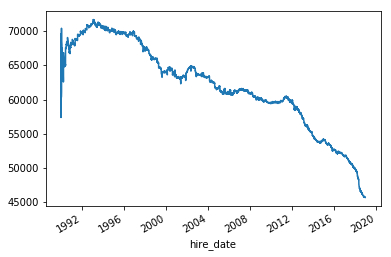

In [109]:
rolling.plot()

In [93]:
rolling.shape

(10199,)

In [111]:
energy = pd.read_csv('./data/energy_consumption.csv', parse_dates=['date'], index_col='date')
energy.head()

,source,energy (btu)
date,,
1973-01-01,residential,1932.187
1973-02-01,residential,1687.255
1973-03-01,residential,1497.067
1973-04-01,residential,1177.661
1973-05-01,residential,1015.008


In [112]:
energy = energy.sort_index()

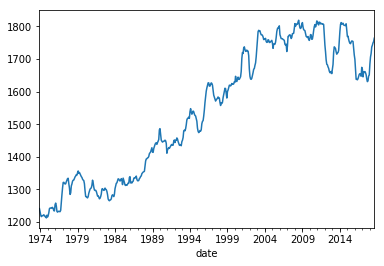

In [118]:
filt = energy['source'] == 'residential'
energy.loc[filt, 'energy (btu)'].rolling(12).agg('mean').dropna().plot()

In [120]:
tg = pd.Grouper(freq="10Y")
energy.groupby(['source', tg]).agg({'energy (btu)': 'mean'})

energy (btu)
source         date                    
commercial     1973-12-31    795.392667
               1983-12-31    861.047933
               1993-12-31   1052.647425
               2003-12-31   1341.764975
               2013-12-31   1492.886183
               2023-12-31   1515.195821
industrial     1973-12-31   2718.553000
               1983-12-31   2577.238783
               1993-12-31   2553.525542
               2003-12-31   2831.440517
               2013-12-31   2623.706108
               2023-12-31   2650.625607
residential    1973-12-31   1241.322000
               1983-12-31   1286.896167
               1993-12-31   1408.975850
               2003-12-31   1632.928025
               2013-12-31   1763.775225
               2023-12-31   1722.517286
transportation 1973-12-31   1551.064583
               1983-12-31   1615.420967
               1993-12-31   1803.501967
               2003-12-31   2115.492858
               2013-12-31   2285.795492
               2023-12-31   2311.641750

In [123]:
energy.pivot_table(index=tg, columns='source', values='energy (btu)')

source,commercial,industrial,residential,transportation
date,,,,
1973-12-31,795.392667,2718.553000,1241.322000,1551.064583
1983-12-31,861.047933,2577.238783,1286.896167,1615.420967
1993-12-31,1052.647425,2553.525542,1408.975850,1803.501967
2003-12-31,1341.764975,2831.440517,1632.928025,2115.492858
2013-12-31,1492.886183,2623.706108,1763.775225,2285.795492
2023-12-31,1515.195821,2650.625607,1722.517286,2311.641750


In [124]:
movies = pd.read_csv('./data/movie.csv')
movies.head()

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
0,Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
2,Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
3,The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,...,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1


In [127]:
movies.loc[movies['title'].str.contains('zz')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
416,All That Jazz,1979.0,Color,R,123.0,Bob Fosse,189.0,Roy Scheider,813.0,Ben Vereen,...,87.0,NaN,Comedy|Drama|Music|Musical,84.0,19228,dancer|editing|stand up comedian|surgery|vomiting,English,USA,NaN,7.8
907,The Dukes of Hazzard,2005.0,Color,PG-13,107.0,Jay Chandrasekhar,422.0,Alice Greczyn,631.0,Jessica Simpson,...,379.0,80270227.0,Action|Adventure|Comedy,144.0,66382,1969 dodge charger|bikini|farm|misogynist|tow ...,English,USA,50000000.0,5.1
1041,Bedazzled,2000.0,Color,PG-13,93.0,Harold Ramis,11000.0,Brendan Fraser,3000.0,Frances O'Connor,...,484.0,37879996.0,Comedy|Fantasy|Romance,125.0,81888,contract|devil|dream|soul|wish,English,USA,48000000.0,6.0
2234,Paparazzi,2004.0,Color,PG-13,84.0,Paul Abascal,2.0,Cole Hauser,787.0,Tom Hollander,...,472.0,15712072.0,Action|Crime|Drama|Thriller,77.0,13210,actor|coma|movie star|paparazzi|revenge,English,USA,20000000.0,5.8
2524,Hot Fuzz,2007.0,Color,R,121.0,Edgar Wright,1000.0,Bill Bailey,175.0,Joe Cornish,...,108.0,23618786.0,Action|Comedy|Mystery,285.0,352695,accident|conspiracy|police|police officer|village,English,UK,8000000.0,7.9
2593,The Lizzie McGuire Movie,2003.0,Color,PG,94.0,Jim Fall,13.0,Clayton Snyder,925.0,Adam Lamberg,...,566.0,42672630.0,Adventure|Comedy|Family|Music|Romance,66.0,27580,best friend|roma|singer|spaghetti|teenager,English,USA,17000000.0,5.3
3215,Into the Grizzly Maze,2015.0,NaN,R,94.0,David Hackl,43.0,Scott Glenn,826.0,Michaela McManus,...,129.0,NaN,Action|Horror|Thriller,48.0,4486,bear|breasts|female nudity|grizzly|wilderness,English,USA,10000000.0,5.3
3535,Mystic Pizza,1988.0,Color,R,104.0,Donald Petrie,80.0,Julia Roberts,8000.0,Lili Taylor,...,658.0,12793213.0,Comedy|Drama|Romance,34.0,18286,commitment|marriage|pizza|title appears in wri...,English,USA,6000000.0,6.2
4399,Blue Like Jazz,2012.0,Color,PG-13,108.0,Steve Taylor,14.0,Jason Marsden,1000.0,Marshall Allman,...,274.0,594904.0,Comedy|Drama,38.0,2582,church|college|color in title|philosophy|texas,English,USA,1200000.0,6.0


In [128]:
movies.loc[movies['title'].str.contains('^9')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
1651,9,2009.0,Color,PG-13,79.0,Shane Acker,30.0,Martin Landau,940.0,Alan Oppenheimer,...,265.0,31743332.0,Action|Adventure|Animation|Drama|Mystery|Sci-F...,263.0,111117,hope|key|machine|number|rag doll,English,USA,30000000.0,7.1
2416,9½ Weeks,1986.0,Color,R,112.0,Adrian Lyne,213.0,David Margulies,567.0,Karen Young,...,45.0,6734844.0,Drama|Romance,38.0,29591,blindfolded woman|control|male dominance|sex g...,English,USA,17000000.0,5.9
3705,90 Minutes in Heaven,2015.0,Color,PG-13,121.0,Michael Polish,35.0,Hayden Christensen,4000.0,Bobby Batson,...,473.0,4700361.0,Drama,12.0,2047,heaven|hospital|praying|pronounced dead|recovery,English,USA,5000000.0,4.6


In [129]:
movies.loc[movies['title'].str.contains('^..b')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
22,Robin Hood,2010.0,Color,PG-13,156.0,Ridley Scott,0.0,Mark Addy,891.0,William Hurt,...,738.0,105219735.0,Action|Adventure|Drama|History,343.0,211765,1190s|archer|england|king of england|robin hood,English,USA,200000000.0,6.7
228,RoboCop,2014.0,Color,PG-13,117.0,José Padilha,294.0,Gary Oldman,10000.0,Abbie Cornish,...,1000.0,58607007.0,Action|Crime|Sci-Fi|Thriller,492.0,182899,law enforcement|police|robocop|robot|technology,English,USA,100000000.0,6.2
286,Public Enemies,2009.0,Color,R,140.0,Michael Mann,0.0,Johnny Depp,40000.0,Christian Bale,...,1000.0,97030725.0,Biography|Crime|Drama|History|Romance,357.0,230931,1930s|bank|celebrity criminal|fbi|public enemy...,English,USA,100000000.0,7.0
448,Robots,2005.0,Color,PG,91.0,Chris Wedge,77.0,Jim Broadbent,1000.0,Drew Carey,...,208.0,128200012.0,Adventure|Animation|Comedy|Family|Sci-Fi,163.0,103022,actor voicing multiple characters|box office h...,English,USA,75000000.0,6.3
494,Babe: Pig in the City,1998.0,Color,G,97.0,George Miller,750.0,Adam Goldberg,1000.0,Elizabeth Daily,...,231.0,18318000.0,Adventure|Comedy|Drama|Family|Fantasy,61.0,24868,animal|farm|farmer|hotel|pig,English,Australia,80000000.0,5.8
556,Unbreakable,2000.0,Color,PG-13,106.0,M. Night Shyamalan,0.0,Robin Wright,18000.0,Bruce Willis,...,963.0,94999143.0,Drama|Mystery|Sci-Fi|Thriller,294.0,245152,child with gun|comic book|invulnerability|supe...,English,USA,75000000.0,7.2
655,Unbroken,2014.0,Color,PG-13,137.0,Angelina Jolie Pitt,11000.0,Finn Wittrock,769.0,Jack O'Connell,...,465.0,115603980.0,Biography|Drama|Sport|War,322.0,103589,emaciation|male nudity|plane crash|prisoner of...,English,USA,65000000.0,7.2
807,"Sabrina, the Teenage Witch",NaN,Color,TV-G,22.0,NaN,NaN,Nate Richert,870.0,Soleil Moon Frye,...,271.0,NaN,Comedy|Family|Fantasy,20.0,24420,female protagonist|hereditary gift of witchcra...,English,USA,3000000.0,6.6
920,Robin Hood: Prince of Thieves,1991.0,Color,PG-13,155.0,Kevin Reynolds,58.0,Alan Rickman,25000.0,Morgan Freeman,...,720.0,165500000.0,Action|Adventure|Drama|Romance,67.0,145257,balladeer|crusades|england|king|modern minstrel,English,USA,48000000.0,6.9
1011,Baby's Day Out,1994.0,Color,PG,99.0,Patrick Read Johnson,32.0,Joe Mantegna,1000.0,Lara Flynn Boyle,...,479.0,16671505.0,Adventure|Comedy|Crime|Drama|Family,22.0,33186,baby|baby boy|kidnapping|kidnapping a child|taxi,English,USA,50000000.0,5.9


In [133]:
movies.loc[movies['title'].str.contains('M..e$')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
704,The Green Mile,1999.0,Color,R,189.0,Frank Darabont,0.0,Tom Hanks,15000.0,Jeffrey DeMunn,...,693.0,136801374.0,Crime|Drama|Fantasy|Mystery,186.0,782610,1930s|death row inmate|healing|prison guard|so...,English,USA,60000000.0,8.5
1167,8 Mile,2002.0,Color,R,110.0,Curtis Hanson,161.0,Mekhi Phifer,1000.0,Omar Benson Miller,...,196.0,116724075.0,Drama|Music,119.0,187181,competition|contest|friend|self expression|whi...,English,USA,41000000.0,7.0
1616,Like Mike,2002.0,Color,PG,99.0,John Schultz,13.0,Brenda Song,1000.0,Robert Forster,...,837.0,51432423.0,Comedy|Family|Fantasy|Sport,39.0,15074,basketball|lightning|nba|orphanage|shoe,English,USA,30000000.0,5.1
2122,Moonlight Mile,2002.0,Color,PG-13,112.0,Brad Silberling,52.0,Jake Gyllenhaal,15000.0,Holly Hunter,...,347.0,6830957.0,Drama|Romance,111.0,11983,1970s|death|district attorney|fiancee|watching...,English,USA,21000000.0,6.7
2486,How She Move,2007.0,Color,PG-13,94.0,Ian Iqbal Rashid,8.0,DeRay Davis,328.0,Clé Bennett,...,66.0,7070459.0,Drama,62.0,4600,dance|dance contest|loss of sister|step dancin...,English,Canada,NaN,3.3
2653,The Muse,1999.0,Color,PG-13,97.0,Albert Brooks,745.0,Jeff Bridges,12000.0,Bradley Whitford,...,745.0,11614236.0,Comedy,97.0,9294,directed by star|muse|satire|screenwriter|tiff...,English,USA,15000000.0,5.6
2913,Max Keeble's Big Move,2001.0,Color,PG,91.0,Tim Hill,25.0,Noel Fisher,833.0,Amber Valletta,...,611.0,17292381.0,Comedy|Crime|Family,37.0,5794,bully|moving|principal|revenge|school,English,USA,12000000.0,5.3
3215,Into the Grizzly Maze,2015.0,NaN,R,94.0,David Hackl,43.0,Scott Glenn,826.0,Michaela McManus,...,129.0,NaN,Action|Horror|Thriller,48.0,4486,bear|breasts|female nudity|grizzly|wilderness,English,USA,10000000.0,5.3
3406,Magic Mike,2012.0,Color,R,110.0,Steven Soderbergh,0.0,Channing Tatum,17000.0,Alex Pettyfer,...,11000.0,113709992.0,Comedy|Drama,324.0,108843,bank|male nudity|male objectification|male str...,English,USA,7000000.0,6.1
3696,Made,2001.0,Color,R,95.0,Jon Favreau,4000.0,Jon Favreau,4000.0,Faizon Love,...,334.0,5308707.0,Comedy|Crime|Drama|Thriller,81.0,15053,friendship|loudmouth|money laundering|new york...,English,USA,5000000.0,6.4


In [135]:
movies.loc[movies['title'].str.contains('^......$')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
0,Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
41,Cars 2,2011.0,Color,G,106.0,John Lasseter,487.0,Joe Mantegna,1000.0,Thomas Kretschmann,...,776.0,191450875.0,Adventure|Animation|Comedy|Family|Sport,304.0,101178,best friend|car race|conspiracy|gadget car|spy,English,USA,200000000.0,6.3
58,WALL·E,2008.0,Color,G,98.0,Andrew Stanton,475.0,John Ratzenberger,1000.0,Fred Willard,...,522.0,223806889.0,Adventure|Animation|Family|Sci-Fi,421.0,718837,earth|obesity|plant|robot|soil,English,USA,180000000.0,8.4
125,Frozen,2013.0,Color,PG,102.0,Chris Buck,69.0,Josh Gad,1000.0,Maurice LaMarche,...,490.0,400736600.0,Adventure|Animation|Comedy|Family|Fantasy|Musical,406.0,421658,magic|sister love|sister sister relationship|s...,English,USA,150000000.0,7.6
168,Sahara,2005.0,Color,PG-13,124.0,Breck Eisner,42.0,Matthew McConaughey,11000.0,Rainn Wilson,...,848.0,68642452.0,Action|Adventure|Comedy|Thriller,163.0,77673,beach|civil war|desert|dictator|ship,English,UK,130000000.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,Clerks,1994.0,Black and White,R,102.0,Kevin Smith,0.0,Jason Mewes,898.0,Brian O'Halloran,...,216.0,3151130.0,Comedy,136.0,181749,clerk|friend|hockey|video|video store,English,USA,230000.0,7.8
4886,Manito,2002.0,Color,NaN,79.0,Eric Eason,3.0,Franky G,93.0,Panchito Gómez,...,42.0,NaN,Drama|Family,28.0,493,ex convict|graduation|manhattan new york city|...,English,USA,24000.0,7.0
4892,Exeter,2015.0,Color,R,91.0,Marcus Nispel,158.0,Ashley Tramonte,630.0,Brittany Curran,...,265.0,NaN,Horror|Mystery|Thriller,43.0,3836,asylum|demon|party|secret|teenager,English,USA,NaN,4.6
4906,Primer,2004.0,Color,PG-13,77.0,Shane Carruth,291.0,Shane Carruth,291.0,David Sullivan,...,8.0,424760.0,Drama|Sci-Fi|Thriller,143.0,72639,changing the future|independent film|invention...,English,USA,7000.0,7.0


In [136]:
movies.loc[movies['title'].str.len() == 6]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
0,Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
41,Cars 2,2011.0,Color,G,106.0,John Lasseter,487.0,Joe Mantegna,1000.0,Thomas Kretschmann,...,776.0,191450875.0,Adventure|Animation|Comedy|Family|Sport,304.0,101178,best friend|car race|conspiracy|gadget car|spy,English,USA,200000000.0,6.3
58,WALL·E,2008.0,Color,G,98.0,Andrew Stanton,475.0,John Ratzenberger,1000.0,Fred Willard,...,522.0,223806889.0,Adventure|Animation|Family|Sci-Fi,421.0,718837,earth|obesity|plant|robot|soil,English,USA,180000000.0,8.4
125,Frozen,2013.0,Color,PG,102.0,Chris Buck,69.0,Josh Gad,1000.0,Maurice LaMarche,...,490.0,400736600.0,Adventure|Animation|Comedy|Family|Fantasy|Musical,406.0,421658,magic|sister love|sister sister relationship|s...,English,USA,150000000.0,7.6
168,Sahara,2005.0,Color,PG-13,124.0,Breck Eisner,42.0,Matthew McConaughey,11000.0,Rainn Wilson,...,848.0,68642452.0,Action|Adventure|Comedy|Thriller,163.0,77673,beach|civil war|desert|dictator|ship,English,UK,130000000.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,Clerks,1994.0,Black and White,R,102.0,Kevin Smith,0.0,Jason Mewes,898.0,Brian O'Halloran,...,216.0,3151130.0,Comedy,136.0,181749,clerk|friend|hockey|video|video store,English,USA,230000.0,7.8
4886,Manito,2002.0,Color,NaN,79.0,Eric Eason,3.0,Franky G,93.0,Panchito Gómez,...,42.0,NaN,Drama|Family,28.0,493,ex convict|graduation|manhattan new york city|...,English,USA,24000.0,7.0
4892,Exeter,2015.0,Color,R,91.0,Marcus Nispel,158.0,Ashley Tramonte,630.0,Brittany Curran,...,265.0,NaN,Horror|Mystery|Thriller,43.0,3836,asylum|demon|party|secret|teenager,English,USA,NaN,4.6
4906,Primer,2004.0,Color,PG-13,77.0,Shane Carruth,291.0,Shane Carruth,291.0,David Sullivan,...,8.0,424760.0,Drama|Sci-Fi|Thriller,143.0,72639,changing the future|independent film|invention...,English,USA,7000.0,7.0


In [142]:
movies.loc[movies['title'].str.contains('^.{14}z')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
2484,American Dreamz,2006.0,Color,PG-13,107.0,Paul Weitz,80.0,Judy Greer,2000.0,Dennis Quaid,...,841.0,7156725.0,Comedy|Music,153.0,22639,chief of staff|contest|president|singing|terro...,English,USA,19000000.0,5.5
2625,Ramona and Beezus,2010.0,Color,G,103.0,Elizabeth Allen Rosenbaum,20.0,Sierra McCormick,512.0,Hutch Dano,...,125.0,26161406.0,Adventure|Comedy|Family|Fantasy,81.0,13874,aunt|cat|death of pet|girl|no opening credits,English,USA,15000000.0,6.7


In [143]:
movies.loc[movies['title'].str.contains('Friends?')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
1055,My Best Friend's Wedding,1997.0,Color,PG-13,105.0,P.J. Hogan,29.0,Julia Roberts,8000.0,Christopher Masterson,...,692.0,126805112.0,Comedy|Romance,84.0,98199,best friend|chick flick|male female friendship...,English,USA,46000000.0,6.3
1413,Friends with Benefits,2011.0,Color,R,109.0,Will Gluck,87.0,Mila Kunis,15000.0,Justin Timberlake,...,923.0,55802754.0,Comedy|Romance,238.0,270228,blow job|female rear nudity|girl in panties|ma...,English,USA,35000000.0,6.6
1775,How to Lose Friends & Alienate People,2008.0,Color,R,110.0,Robert B. Weide,53.0,James Corden,480.0,Katherine Parkinson,...,87.0,2775593.0,Comedy|Drama|Romance,135.0,61269,celebrity|party|pig|starlet|writer,English,UK,27000000.0,6.5
2216,My Best Friend's Girl,2008.0,Color,R,112.0,Howard Deutch,41.0,Dane Cook,1000.0,Taran Killam,...,490.0,19151864.0,Comedy|Romance,80.0,36983,breasts|female rear nudity|jesus crust pizza p...,English,USA,40000000.0,5.9
3116,Seeking a Friend for the End of the World,2012.0,Black and White,R,101.0,Lorene Scafaria,63.0,Steve Carell,7000.0,Mark Moses,...,172.0,6619173.0,Adventure|Comedy|Drama|Romance|Sci-Fi,265.0,87203,candle|end of the world|letter|record|road trip,English,USA,10000000.0,6.7
3495,Friends with Money,2006.0,Color,R,88.0,Nicole Holofcener,132.0,Greg Germann,435.0,Marin Hinkle,...,180.0,13367101.0,Comedy|Drama|Romance,111.0,19715,friend|friendship|marital problem|money proble...,English,USA,6500000.0,5.9
4184,We Are Your Friends,2015.0,Color,R,96.0,Max Joseph,31.0,Vanessa Lengies,804.0,Emily Ratajkowski,...,328.0,3590010.0,Drama|Music|Romance,158.0,20885,box office flop|critically bashed|male objecti...,English,UK,2000000.0,6.1
4279,Dysfunctional Friends,2012.0,Color,Not Rated,111.0,Corey Grant,21.0,Christian Keyes,761.0,Essence Atkins,...,685.0,NaN,Comedy|Drama,4.0,686,ex boyfriend ex girlfriend relationship|gossip...,English,USA,1800000.0,5.4
4670,Mutual Friends,2013.0,Color,NaN,86.0,Matthew Watts,0.0,Jennifer Lafleur,873.0,Cheyenne Jackson,...,304.0,NaN,Comedy|Romance,3.0,64,bromance|manhattan new york city|new york city...,English,USA,450000.0,6.8


In [148]:
movies.loc[movies['title'].str.contains('^.{40,43}$')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
1,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1
13,Pirates of the Caribbean: Dead Man's Chest,2006.0,Color,PG-13,151.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,...,1000.0,423032628.0,Action|Adventure|Fantasy,313.0,522040,box office hit|giant squid|heart|liar's dice|m...,English,USA,225000000.0,7.3
16,The Chronicles of Narnia: Prince Caspian,2008.0,Color,PG,150.0,Andrew Adamson,80.0,Peter Dinklage,22000.0,Pierfrancesco Favino,...,201.0,141614023.0,Action|Adventure|Family|Fantasy,258.0,149922,brother brother relationship|brother sister re...,English,USA,225000000.0,6.6
18,Pirates of the Caribbean: On Stranger Tides,2011.0,Color,PG-13,136.0,Rob Marshall,252.0,Johnny Depp,40000.0,Sam Claflin,...,1000.0,241063875.0,Action|Adventure|Fantasy,448.0,370704,blackbeard|captain|pirate|revenge|soldier,English,USA,250000000.0,6.7
20,The Hobbit: The Battle of the Five Armies,2014.0,Color,PG-13,164.0,Peter Jackson,0.0,Aidan Turner,5000.0,Adam Brown,...,773.0,255108370.0,Adventure|Fantasy,422.0,354228,army|elf|hobbit|middle earth|orc,English,New Zealand,250000000.0,7.5
114,Harry Potter and the Order of the Phoenix,2007.0,Color,PG-13,138.0,David Yates,282.0,Robert Pattinson,21000.0,Daniel Radcliffe,...,687.0,292000866.0,Adventure|Family|Fantasy|Mystery,329.0,355137,battle|magic|school|teacher|wizard,English,UK,150000000.0,7.5
173,The Twilight Saga: Breaking Dawn - Part 2,2012.0,Color,PG-13,115.0,Bill Condon,386.0,Robert Pattinson,21000.0,Kristen Stewart,...,12000.0,292298923.0,Adventure|Drama|Fantasy|Romance,322.0,185394,battle|friend|super strength|vampire|vision,English,USA,120000000.0,5.5
193,Harry Potter and the Prisoner of Azkaban,2004.0,Color,PG,142.0,Alfonso Cuarón,0.0,Daniel Radcliffe,11000.0,Gary Oldman,...,10000.0,249358727.0,Adventure|Family|Fantasy|Mystery,274.0,382255,magic|muggle|serial killer|traitor|wizard,English,UK,130000000.0,7.8
237,Star Wars: Episode I - The Phantom Menace,1999.0,Color,PG,136.0,George Lucas,0.0,Natalie Portman,20000.0,Liam Neeson,...,1000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,320.0,534658,alien|character says i have a bad feeling abou...,English,USA,115000000.0,6.5


In [147]:
filt1 = movies['title'].str.len() >= 40
filt2 = movies['title'].str.len() <= 43
movies.loc[ filt1 & filt2 ]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
1,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1
13,Pirates of the Caribbean: Dead Man's Chest,2006.0,Color,PG-13,151.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,...,1000.0,423032628.0,Action|Adventure|Fantasy,313.0,522040,box office hit|giant squid|heart|liar's dice|m...,English,USA,225000000.0,7.3
16,The Chronicles of Narnia: Prince Caspian,2008.0,Color,PG,150.0,Andrew Adamson,80.0,Peter Dinklage,22000.0,Pierfrancesco Favino,...,201.0,141614023.0,Action|Adventure|Family|Fantasy,258.0,149922,brother brother relationship|brother sister re...,English,USA,225000000.0,6.6
18,Pirates of the Caribbean: On Stranger Tides,2011.0,Color,PG-13,136.0,Rob Marshall,252.0,Johnny Depp,40000.0,Sam Claflin,...,1000.0,241063875.0,Action|Adventure|Fantasy,448.0,370704,blackbeard|captain|pirate|revenge|soldier,English,USA,250000000.0,6.7
20,The Hobbit: The Battle of the Five Armies,2014.0,Color,PG-13,164.0,Peter Jackson,0.0,Aidan Turner,5000.0,Adam Brown,...,773.0,255108370.0,Adventure|Fantasy,422.0,354228,army|elf|hobbit|middle earth|orc,English,New Zealand,250000000.0,7.5
114,Harry Potter and the Order of the Phoenix,2007.0,Color,PG-13,138.0,David Yates,282.0,Robert Pattinson,21000.0,Daniel Radcliffe,...,687.0,292000866.0,Adventure|Family|Fantasy|Mystery,329.0,355137,battle|magic|school|teacher|wizard,English,UK,150000000.0,7.5
173,The Twilight Saga: Breaking Dawn - Part 2,2012.0,Color,PG-13,115.0,Bill Condon,386.0,Robert Pattinson,21000.0,Kristen Stewart,...,12000.0,292298923.0,Adventure|Drama|Fantasy|Romance,322.0,185394,battle|friend|super strength|vampire|vision,English,USA,120000000.0,5.5
193,Harry Potter and the Prisoner of Azkaban,2004.0,Color,PG,142.0,Alfonso Cuarón,0.0,Daniel Radcliffe,11000.0,Gary Oldman,...,10000.0,249358727.0,Adventure|Family|Fantasy|Mystery,274.0,382255,magic|muggle|serial killer|traitor|wizard,English,UK,130000000.0,7.8
237,Star Wars: Episode I - The Phantom Menace,1999.0,Color,PG,136.0,George Lucas,0.0,Natalie Portman,20000.0,Liam Neeson,...,1000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,320.0,534658,alien|character says i have a bad feeling abou...,English,USA,115000000.0,6.5


In [150]:
movies.loc[movies['title'].str.contains('^The.*Movie$')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
319,The Peanuts Movie,2015.0,Color,G,88.0,Steve Martino,20.0,Francesca Capaldi,144.0,Venus Schultheis,...,36.0,130174897.0,Adventure|Animation|Comedy|Family,208.0,27918,dog|girl|imagination|peanuts|red hair,English,USA,99000000.0,7.2
561,The Angry Birds Movie,2016.0,Color,PG,97.0,Clay Kaytis,6.0,Peter Dinklage,22000.0,Josh Gad,...,415.0,107225164.0,Action|Animation|Comedy|Family,141.0,27130,butt|downward duck|fish|kingfisher|pig,English,USA,73000000.0,6.3
569,The Simpsons Movie,2007.0,Color,PG-13,87.0,David Silverman,30.0,Albert Brooks,745.0,Yeardley Smith,...,433.0,183132370.0,Adventure|Animation|Comedy,299.0,259083,alaska|dome|lake|pig|the simpsons,English,USA,75000000.0,7.4
759,The Lego Movie,2014.0,Color,PG,100.0,Phil Lord,97.0,Morgan Freeman,11000.0,Will Ferrell,...,2000.0,257756197.0,Action|Adventure|Animation|Comedy|Family|Fantasy,435.0,246698,based on toy|dual personality|evil businessman...,English,Australia,60000000.0,7.8
1586,The SpongeBob SquarePants Movie,2004.0,Color,PG,87.0,Stephen Hillenburg,47.0,Scarlett Johansson,19000.0,Bill Fagerbakke,...,217.0,85416609.0,Adventure|Animation|Comedy|Family|Fantasy,89.0,58906,based on tv series|crown|dream|king neptune|pl...,English,USA,30000000.0,7.0
1734,The Rugrats Movie,1998.0,Color,G,83.0,Igor Kovalyov,5.0,Elizabeth Daily,971.0,Cree Summer,...,368.0,100491683.0,Adventure|Animation|Comedy|Drama|Family|Musical,45.0,14005,baby|home|hospital|lost|newborn baby,English,USA,24000000.0,5.9
1895,The Wild Thornberrys Movie,2002.0,Color,PG,85.0,Cathy Malkasian,0.0,Alfre Woodard,1000.0,Flea,...,503.0,39880476.0,Adventure|Animation|Comedy|Family|Fantasy,38.0,12218,africa|chimpanzee|elephant|safari|shaman,English,USA,25000000.0,5.2
2162,The Tigger Movie,2000.0,Color,G,77.0,Jun Falkenstein,25.0,Kath Soucie,304.0,John Fiedler,...,16.0,45542421.0,Animation|Comedy|Drama|Family|Musical,89.0,13319,cartoon tiger|coming of age|tiger|tigger|title...,English,USA,30000000.0,6.3
2593,The Lizzie McGuire Movie,2003.0,Color,PG,94.0,Jim Fall,13.0,Clayton Snyder,925.0,Adam Lamberg,...,566.0,42672630.0,Adventure|Comedy|Family|Music|Romance,66.0,27580,best friend|roma|singer|spaghetti|teenager,English,USA,17000000.0,5.3
2645,The Pirates Who Don't Do Anything: A VeggieTal...,2008.0,Color,G,85.0,Mike Nawrocki,12.0,Yuri Lowenthal,354.0,Cam Clarke,...,23.0,12701880.0,Adventure|Animation|Comedy|Family,37.0,2037,17th century|king|pirate|vegetable|waiter,English,USA,15000000.0,5.7


In [151]:
movies.loc[movies['title'].str.contains('^The [0-9]')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
212,The 13th Warrior,1999.0,Color,R,102.0,John McTiernan,323.0,Tony Curran,845.0,Vladimir Kulich,...,241.0,32694788.0,Action|Adventure|History,85.0,101411,arab|battle|combat|viking|warrior,English,USA,85000000.0,6.6
429,The 6th Day,2000.0,Color,PG-13,123.0,Roger Spottiswoode,55.0,Robert Duvall,3000.0,Michael Rapaport,...,956.0,34543701.0,Action|Mystery|Sci-Fi|Thriller,170.0,100001,clone|cloning|future|laser gun|murder,English,USA,82000000.0,5.9
1354,The 5th Wave,2016.0,Color,PG-13,112.0,J Blakeson,5.0,Chloë Grace Moretz,17000.0,Maggie Siff,...,724.0,34912982.0,Action|Adventure|Sci-Fi|Thriller,194.0,55617,alien|attack|based on novel|based on young adu...,English,USA,38000000.0,5.2
1817,The 40-Year-Old Virgin,2005.0,Color,R,133.0,Judd Apatow,0.0,Steve Carell,7000.0,Romany Malco,...,218.0,109243478.0,Comedy|Romance,217.0,313797,40 year old|car accident|cheating on girlfrien...,English,USA,26000000.0,7.1
1958,The 33,2015.0,Color,PG-13,127.0,Patricia Riggen,36.0,Marco Treviño,562.0,James Brolin,...,399.0,12188642.0,Biography|Drama|History,120.0,21098,disaster movie|mine|minister|president|trapped...,English,Chile,26000000.0,6.9
3567,The 5th Quarter,2010.0,Color,PG,90.0,Rick Bieber,11.0,Aidan Quinn,767.0,Kendrick Cross,...,316.0,399611.0,Biography|Drama|Sport,16.0,1245,athletic training|football practice|funeral|gy...,English,USA,6000000.0,5.7
4373,The 41-Year-Old Virgin Who Knocked Up Sarah Ma...,2010.0,Color,R,82.0,Craig Moss,19.0,Noureen DeWulf,700.0,Bryan Callen,...,134.0,NaN,Comedy,16.0,5579,masturbation|porn actor in mainstream movie|se...,English,USA,1300000.0,2.7


In [153]:
movies.loc[movies['title'].str.contains('[A-Z]{3}')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,...,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1
40,TRON: Legacy,2010.0,Color,PG,125.0,Joseph Kosinski,364.0,Jeff Bridges,12000.0,Olivia Wilde,...,1000.0,172051787.0,Action|Adventure|Sci-Fi,469.0,264183,arcade|bridge|disappearance|escape|warrior,English,USA,170000000.0,6.8
58,WALL·E,2008.0,Color,G,98.0,Andrew Stanton,475.0,John Ratzenberger,1000.0,Fred Willard,...,522.0,223806889.0,Adventure|Animation|Family|Sci-Fi,421.0,718837,earth|obesity|plant|robot|soil,English,USA,180000000.0,8.4
140,Mission: Impossible III,2006.0,Color,PG-13,124.0,J.J. Abrams,14000.0,Philip Seymour Hoffman,22000.0,Tom Cruise,...,979.0,133382309.0,Action|Adventure|Thriller,310.0,256695,arms dealer|fictional government agency|missio...,English,USA,150000000.0,6.9
177,The BFG,2016.0,Color,PG,117.0,Steven Spielberg,14000.0,Mark Rylance,535.0,Penelope Wilton,...,358.0,52792307.0,Adventure|Family|Fantasy,252.0,12572,cannibal|evil brother|giant|london england|queen,English,UK,140000000.0,6.8
233,Star Wars: Episode III - Revenge of the Sith,2005.0,Color,PG-13,140.0,George Lucas,0.0,Natalie Portman,20000.0,Christopher Lee,...,4000.0,380262555.0,Action|Adventure|Fantasy|Sci-Fi,359.0,520104,elongated cry of no|friends become enemies|kic...,English,USA,113000000.0,7.6
340,Jurassic Park III,2001.0,Color,PG-13,92.0,Joe Johnston,394.0,Michael Jeter,693.0,Trevor Morgan,...,527.0,181166115.0,Action|Adventure|Sci-Fi|Thriller,198.0,219501,dinosaur|island|jurassic park|paleontologist|s...,English,USA,93000000.0,5.9
440,RED 2,2013.0,Color,PG-13,116.0,Dean Parisot,23.0,Bruce Willis,13000.0,Anthony Hopkins,...,110.0,53215979.0,Action|Comedy|Crime|Thriller,234.0,125036,cia|cia agent|rescue|russian|team,English,USA,84000000.0,6.7
589,AVP: Alien vs. Predator,2004.0,Color,PG-13,109.0,Paul W.S. Anderson,545.0,Sanaa Lathan,886.0,Colin Salmon,...,727.0,80281096.0,Action|Horror|Sci-Fi|Thriller,247.0,143628,alien|antarctica|predator|pyramid|satellite,English,USA,60000000.0,5.6
725,RED,2010.0,Color,PG-13,111.0,Robert Schwentke,124.0,Bruce Willis,13000.0,Morgan Freeman,...,357.0,90356857.0,Action|Comedy|Crime|Thriller,315.0,238916,cia|female assassin|interrogation|office cubic...,English,USA,58000000.0,7.1


In [155]:
movies.loc[movies['title'].str.contains('^[A-Z].*[A-Z]$')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
46,World War Z,2013.0,Color,PG-13,123.0,Marc Forster,395.0,Peter Capaldi,17000.0,Brad Pitt,...,1000.0,202351611.0,Action|Adventure|Horror|Sci-Fi|Thriller,654.0,465019,chaos|disease|infection|pandemic|zombie,English,USA,190000000.0,7.0
58,WALL·E,2008.0,Color,G,98.0,Andrew Stanton,475.0,John Ratzenberger,1000.0,Fred Willard,...,522.0,223806889.0,Adventure|Animation|Family|Sci-Fi,421.0,718837,earth|obesity|plant|robot|soil,English,USA,180000000.0,8.4
140,Mission: Impossible III,2006.0,Color,PG-13,124.0,J.J. Abrams,14000.0,Philip Seymour Hoffman,22000.0,Tom Cruise,...,979.0,133382309.0,Action|Adventure|Thriller,310.0,256695,arms dealer|fictional government agency|missio...,English,USA,150000000.0,6.9
151,Men in Black II,2002.0,Color,PG-13,88.0,Barry Sonnenfeld,188.0,Will Smith,10000.0,Rosario Dawson,...,826.0,190418803.0,Action|Adventure|Comedy|Family|Fantasy|Mystery...,208.0,270207,alien|lingerie|lingerie model|m.i.b.|pug,English,USA,140000000.0,6.1
177,The BFG,2016.0,Color,PG,117.0,Steven Spielberg,14000.0,Mark Rylance,535.0,Penelope Wilton,...,358.0,52792307.0,Adventure|Family|Fantasy,252.0,12572,cannibal|evil brother|giant|london england|queen,English,UK,140000000.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158,The Toxic Avenger Part II,1989.0,Color,R,96.0,Michael Herz,6.0,Phoebe Legere,40.0,Jessica Dublin,...,14.0,792966.0,Action|Comedy|Horror|Sci-Fi,49.0,4663,bare breasts|japan|tokyo japan|toxic avenger|t...,English,USA,2300000.0,5.1
4204,House of D,2004.0,Color,PG-13,96.0,David Duchovny,0.0,Robin Williams,49000.0,Mark Margolis,...,902.0,371081.0,Comedy|Drama,46.0,7479,artist|butchery|catholic|catholic school|friend,English,USA,6000000.0,7.0
4218,Return of the Living Dead III,1993.0,Color,R,97.0,Brian Yuzna,97.0,Melinda Clarke,787.0,Kent McCord,...,163.0,NaN,Horror|Romance|Sci-Fi,46.0,10182,female nudity|living dead|self mutilation|sequ...,English,USA,2000000.0,5.9
4240,The Ghastly Love of Johnny X,2012.0,Black and White,Not Rated,106.0,Paul Bunnell,5.0,Kate Maberly,416.0,Kevin McCarthy,...,356.0,2436.0,Comedy|Fantasy|Musical|Sci-Fi,94.0,344,1950s|independent film|outlaw|trial,English,USA,2000000.0,5.7


In [156]:
movies.loc[movies['title'].str.contains('[0-9],[0-9]')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
276,"10,000 B.C.",NaN,NaN,NaN,22.0,Christopher Barnard,0.0,Mathew Buck,5.0,NaN,...,NaN,NaN,Comedy,NaN,6,NaN,NaN,NaN,NaN,7.2
3266,"Ultramarines: A Warhammer 40,000 Movie",2010.0,Color,R,76.0,Martyn Pick,4.0,Sean Pertwee,722.0,Steven Waddington,...,151.0,NaN,Action|Animation|Fantasy|Horror|Mystery|Sci-Fi...,19.0,4990,grimdark|mutilated corpse|space marine|ultrama...,English,UK,NaN,5.7
3641,"20,000 Leagues Under the Sea",1954.0,Color,Approved,127.0,Richard Fleischer,130.0,James Mason,617.0,Robert J. Wilke,...,51.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,69.0,22123,captain|expedition|sea|submarine|whale,English,USA,5000000.0,7.2
4775,"The Beast from 20,000 Fathoms",1953.0,Black and White,Approved,80.0,Eugène Lourié,7.0,Kenneth Tobey,57.0,Cecil Kellaway,...,21.0,5000000.0,Adventure|Horror|Sci-Fi,67.0,4812,arctic|beast|dinosaur|monster|rhedosaurus,English,USA,210000.0,6.7


In [161]:
movies.loc[movies['title'].str.contains('\&|\?')]

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
129,Angels & Demons,2009.0,Color,PG-13,146.0,Ron Howard,2000.0,Tom Hanks,15000.0,Ayelet Zurer,...,294.0,133375846.0,Mystery|Thriller,298.0,207839,conclave|illuminati|murder|reference to bernin...,English,USA,150000000.0,6.7
145,Mr. Peabody & Sherman,2014.0,Color,PG,92.0,Rob Minkoff,50.0,Ty Burrell,3000.0,Zach Callison,...,517.0,111505642.0,Adventure|Animation|Comedy|Family|Sci-Fi,196.0,47900,dog|father son relationship|inventor|talking d...,English,USA,145000000.0,6.9
214,Batman & Robin,1997.0,Color,PG-13,125.0,Joel Schumacher,541.0,Michael Gough,920.0,Vivica A. Fox,...,409.0,107285004.0,Action,183.0,189855,butler|critically bashed|cure|freeze|gotham,English,USA,125000000.0,3.7
252,Mr. & Mrs. Smith,2005.0,Color,PG-13,126.0,Doug Liman,218.0,Brad Pitt,11000.0,Angelina Jolie Pitt,...,322.0,186336103.0,Action|Comedy|Crime|Romance|Thriller,233.0,348861,assassin|marriage|secret agent|suburb|target,English,USA,120000000.0,6.5
278,Town & Country,2001.0,Color,R,104.0,Peter Chelsom,23.0,Del Zamora,752.0,Warren Beatty,...,591.0,6712451.0,Comedy|Romance,62.0,4102,anniversary|architect|cellist|friend|hardware ...,English,New Line,90000000.0,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,Chuck & Buck,2000.0,Color,R,96.0,Miguel Arteta,44.0,Lupe Ontiveros,625.0,Mike White,...,129.0,1050600.0,Comedy|Drama,59.0,4662,best friend|bisexuality|friend|gay kiss|sexuality,English,USA,250000.0,6.6
4819,Roger & Me,1989.0,Color,R,91.0,Michael Moore,909.0,Michael Moore,909.0,Pat Boone,...,42.0,6706368.0,Documentary,40.0,22800,factory|flint michigan|general motors|michigan...,English,USA,160000.0,7.5
4838,"Dude, Where's My Dog?!",2014.0,Color,PG,82.0,Stephen Langford,7.0,Kevin P. Farley,143.0,Gabriela Castillo,...,50.0,NaN,Family,2.0,73,NaN,English,USA,20000.0,3.2
4846,"Peace, Propaganda & the Promised Land",2004.0,Color,NaN,80.0,Sut Jhally,3.0,Noam Chomsky,103.0,Seth Ackerman,...,0.0,NaN,Documentary,16.0,496,arab israeli conflict|israel|media|middle east...,English,USA,70000.0,8.3


In [168]:
movies['title'].str.count('[&.?]').sort_values(ascending=False)

542     5
201     4
4378    4
585     4
3929    4
       ..
3247    0
3248    0
3249    0
3250    0
0       0
Name: title, Length: 4916, dtype: int64

In [169]:
titles = movies['title']

In [173]:
titles.str.extract(r'^The (\d+)').dropna()

,0
212,13
429,6
1354,5
1817,40
1958,33
3567,5
4373,41


In [176]:
titles[titles.str.contains(r'\d+\D+\d+')]

276                                10,000 B.C.
289                 The Taking of Pelham 1 2 3
509                           2 Fast 2 Furious
1043                              3:10 to Yuma
1610                            13 Going on 30
1617        Naked Gun 33 1/3: The Final Insult
2466                     40 Days and 40 Nights
2646                                     U2 3D
3266    Ultramarines: A Warhammer 40,000 Movie
3308                                     50/50
3516                           Fahrenheit 9/11
3576                                     11:14
3641              20,000 Leagues Under the Sea
3934                                      2:13
4210                   24 7: Twenty Four Seven
4376                    Friday the 13th Part 2
4532              4 Months, 3 Weeks and 2 Days
4775             The Beast from 20,000 Fathoms
Name: title, dtype: object

In [182]:
titles[titles.str.contains(r'[^aeiouAEIOU ]{6,}')]

276                                10,000 B.C.
542                    The Man from U.N.C.L.E.
1935                          Punch-Drunk Love
2392                                  Catch-22
2480                         Brooklyn's Finest
2507                   When Harry Met Sally...
2912        Tales from the Crypt: Demon Knight
3266    Ultramarines: A Warhammer 40,000 Movie
3641              20,000 Leagues Under the Sea
4775             The Beast from 20,000 Fathoms
Name: title, dtype: object

In [184]:
titles.str.extract(r'(?:t|T)(.)').dropna()

,0
0,a
1,e
2,r
3,h
4,a
...,...
4904,u
4907,e
4909,h
4912,h


In [188]:
titles.str.extract(r'[tT](.)').dropna()[0].value_counts()

h    1431
      311
e     266
o     183
i     169
a     156
r     141
t      79
y      66
u      50
s      45
c      33
m      28
w      22
l      22
'      20
:      11
b       7
.       7
n       3
f       3
v       2
-       2
z       2
p       2
g       2
!       2
,       2
L       1
d       1
/       1
R       1
M       1
Name: 0, dtype: int64

In [197]:
titles.str.extract(r'\b([tT]\w*e)\b').dropna()[0].value_counts()

The              1080
the               337
Time               16
Tale                9
True                7
Take                6
There               6
Teenage             5
Three               4
Trade               4
Trouble             3
Treasure            2
Terrace             2
Twice               1
Timeline            1
Torque              1
Tadpole             1
Turtle              1
Tootsie             1
Tombstone           1
Trance              1
Thunderdome         1
Turbulence          1
Transcendence       1
Tae                 1
Triangle            1
Throttle            1
Twelve              1
Trapeze             1
Tape                1
Tide                1
Thr3e               1
Triple              1
Name: 0, dtype: int64